# Агрегированное распределение трат населения в различных точках на карте РФ.

Сайт https://geochecki-vpd.nalog.gov.ru/geochecks

In [1]:
import requests
import pandas as pd
import json
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon
import folium

In [2]:
# Можно скачать ограничивающие прямоугольники для городов, и таким образом менять масштаб выгрузки

# bounding boxes
NorthEast_1 = '4194415.04416543'
NorthEast_2 = '7508609.934606909'
SouthWest_1 = '4182347.5483265882'
SouthWest_2 = '7506345.487644272'

# h3 resolution requests
H3Resolution = '10'

In [3]:
www = f'https://geochecki-vpd.nalog.gov.ru/api/Metrics/bounds?NorthEast={NorthEast_1}&NorthEast={NorthEast_2}&SouthWest={SouthWest_1}&SouthWest={SouthWest_2}&H3Resolution={H3Resolution}'

In [4]:
r = requests.get(www)

In [5]:
r.status_code

200

In [6]:
if r.status_code == 200:
    print('OK')
else:
      print('Not OK')

OK


In [7]:
r.text

'{"type" : "FeatureCollection", "features" : [{"type": "Feature", "geometry": {"type":"Polygon","coordinates":[[[37.630299019,55.738584761],[37.630928882,55.738023685],[37.632058283,55.738090018],[37.632557851,55.738717434],[37.63192799,55.73927852],[37.630798559,55.73921218],[37.630299019,55.738584761]]]}, "properties": {"Id": "cac533ac-d8ad-11ee-86a3-005056a0313a", "H3Id": "8a11aa78cd77fff", "KktCount": [4,7], "AverageBill": null, "TruncatedAverageBill": null, "MedianBill": null, "CacheBillPercent": null, "CachePayPercent": null, "IntensityOfNumberBills": 7, "RevenueIntensity": 10, "PeriodStart": "2024-02-12T00:00:00", "PeriodEnd": "2024-02-18T23:59:59", "IsMall": false, "IsRare": false, "IsEcommerce": false, "TopCategories": null, "Title": "Москва, Старый Толмачёвский переулок", "ActiveHours": [0,0,0,0,0,0,0,0,0,0.7,2.6,4.6,4.7,23.1,19.6,12.3,6.3,5.9,6.9,6.1,6.4,0.6,0.4,0], "ReceiptTotalCount": 1712}}, {"type": "Feature", "geometry": {"type":"Polygon","coordinates":[[[37.645352352,5

In [8]:
# Convert json into dictionary
r_dict = r.json()
r_json = json.dumps(r_dict, indent=4, sort_keys=True)

# Pretty Printing JSON string back
print(json.dumps(r_dict, indent=4, sort_keys=True))

{
    "features": [
        {
            "geometry": {
                "coordinates": [
                    [
                        [
                            37.630299019,
                            55.738584761
                        ],
                        [
                            37.630928882,
                            55.738023685
                        ],
                        [
                            37.632058283,
                            55.738090018
                        ],
                        [
                            37.632557851,
                            55.738717434
                        ],
                        [
                            37.63192799,
                            55.73927852
                        ],
                        [
                            37.630798559,
                            55.73921218
                        ],
                        [
                            37.630299019,
        

}


In [9]:
df = pd.json_normalize(r_dict["features"])

In [10]:
df

,type,geometry.type,geometry.coordinates,properties.Id,properties.H3Id,properties.KktCount,properties.AverageBill,properties.TruncatedAverageBill,properties.MedianBill,properties.CacheBillPercent,...,properties.RevenueIntensity,properties.PeriodStart,properties.PeriodEnd,properties.IsMall,properties.IsRare,properties.IsEcommerce,properties.TopCategories,properties.Title,properties.ActiveHours,properties.ReceiptTotalCount
0,Feature,Polygon,"[[[37.630299019, 55.738584761], [37.630928882,...",cac533ac-d8ad-11ee-86a3-005056a0313a,8a11aa78cd77fff,"[4, 7]",None,None,None,None,...,10,2024-02-12T00:00:00,2024-02-18T23:59:59,False,False,False,None,"Москва, Старый Толмачёвский переулок","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.7, 2.6, 4.6, 4.7...",1712
1,Feature,Polygon,"[[[37.645352352, 55.74126241], [37.64598213, 5...",e2cf13fa-d8ad-11ee-86a3-005056a0313a,8a11aa78c007fff,"[5, 7]",None,None,None,None,...,9,2024-02-12T00:00:00,2024-02-18T23:59:59,False,False,False,None,"Москва, Котельническая набережная","[0, 0, 0, 0, 0, 0, 0, 0, 1.5, 3.1, 4.7, 6.9, 7...",3045
2,Feature,Polygon,"[[[37.646981887, 55.741956026], [37.647611661,...",c3ad7c3c-d8ad-11ee-b672-005056a0313a,8a11aa78c00ffff,"[2, 7]",None,None,None,None,...,6,2024-02-12T00:00:00,2024-02-18T23:59:59,False,False,False,None,"Москва, 5-й Котельнический переулок","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9, 4.4,...",229
3,Feature,Polygon,"[[[37.63192799, 55.73927852], [37.632557851, 5...",de7a6a84-d8ad-11ee-b672-005056a0313a,8a11aa78cd47fff,"[14, 7]",None,None,None,None,...,9,2024-02-12T00:00:00,2024-02-18T23:59:59,False,False,False,None,"Москва, Большая Татарская улица","[1.2, 0.6, 0.3, 0.2, 0.1, 0.2, 0.5, 2.4, 6, 6....",8885
4,Feature,Polygon,"[[[37.638834984, 55.738487812], [37.639464775,...",de8579b0-d8ad-11ee-b672-005056a0313a,8a11aa78cc5ffff,"[9, 7]","[9471, 1453]","[6182, 468]","[5000, 200]","[17, 19]",...,8,2024-02-12T00:00:00,2024-02-18T23:59:59,False,False,False,"[Туристические услуги, Кафе и рестораны, Спорт...","Москва, Садовническая набережная","[2.7, 2.5, 1.7, 3, 1.5, 3, 2.5, 0, 0.2, 0, 0, ...",399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,Feature,Polygon,"[[[37.623261795, 55.740563405], [37.623891749,...",ebfbd85a-d8ad-11ee-b672-005056a0313a,8a11aa7aa60ffff,"[6, 7]",None,None,None,None,...,7,2024-02-12T00:00:00,2024-02-18T23:59:59,False,False,False,None,"Москва, улица Большая Ордынка, 22/2","[1.6, 0, 0, 0, 0, 0.3, 1, 2.2, 3.1, 3.1, 2.2, ...",5432
375,Feature,Polygon,"[[[37.620849399, 55.747000071], [37.621479471,...",efd41370-d8ad-11ee-86a3-005056a0313a,8a11aa7aa217fff,"[1, 7]",None,None,None,None,...,4,2024-02-12T00:00:00,2024-02-18T23:59:59,False,False,False,None,"Россия, Москва, Болотная улица, 14с2","[0, 7.1, 4.8, 0, 0, 0, 0, 0, 0, 2.4, 2.4, 11.9...",42
376,Feature,Polygon,"[[[37.622608999, 55.746505554], [37.623239048,...",efd120ac-d8ad-11ee-86a3-005056a0313a,8a11aa7aa2affff,"[1, 7]",None,None,None,None,...,3,2024-02-12T00:00:00,2024-02-18T23:59:59,False,False,False,None,"Москва, Болотная улица","[1.1, 1.3, 0.4, 0.4, 0.4, 0.1, 0.2, 0.1, 0, 0....",1587
377,Feature,Polygon,"[[[37.640074002, 55.742747111], [37.640703847,...",e2c6b106-d8ad-11ee-86a3-005056a0313a,8a11aa78c12ffff,"[2, 7]",None,None,None,None,...,4,2024-02-12T00:00:00,2024-02-18T23:59:59,False,False,False,None,"Москва, Космодамианская набережная, 22с1А","[0, 0, 0, 0, 0, 0, 0, 0, 3.8, 9.8, 9, 7.5, 14....",133


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   type                               379 non-null    object
 1   geometry.type                      379 non-null    object
 2   geometry.coordinates               379 non-null    object
 3   properties.Id                      379 non-null    object
 4   properties.H3Id                    379 non-null    object
 5   properties.KktCount                379 non-null    object
 6   properties.AverageBill             136 non-null    object
 7   properties.TruncatedAverageBill    136 non-null    object
 8   properties.MedianBill              136 non-null    object
 9   properties.CacheBillPercent        136 non-null    object
 10  properties.CachePayPercent         136 non-null    object
 11  properties.IntensityOfNumberBills  379 non-null    int64 
 12  properti

In [12]:
df.isna().sum()

type                                   0
geometry.type                          0
geometry.coordinates                   0
properties.Id                          0
properties.H3Id                        0
properties.KktCount                    0
properties.AverageBill               243
properties.TruncatedAverageBill      243
properties.MedianBill                243
properties.CacheBillPercent          243
properties.CachePayPercent           243
properties.IntensityOfNumberBills      0
properties.RevenueIntensity            0
properties.PeriodStart                 0
properties.PeriodEnd                   0
properties.IsMall                      0
properties.IsRare                      0
properties.IsEcommerce                 0
properties.TopCategories             247
properties.Title                       0
properties.ActiveHours                 0
properties.ReceiptTotalCount           0
dtype: int64

In [13]:
# data = {"geometry": [], "type": []}
data = {"geometry": [],}
for i, row in df[['geometry.coordinates']].iterrows():
    if len(row[0]) == 1:
        g = Polygon(row[0][0])
        data["geometry"].append(g)
#         data["type"].append("Polygon")
    else:
        print()
        g = MultiPolygon([Polygon(r) for r in row[0][0]])
        data["geometry"].append(g)
#         data["type"].append("MultiPolygon")
data_prepared = pd.DataFrame(data).join(df)
gdf = gpd.GeoDataFrame(data_prepared, geometry='geometry').set_crs("EPSG:4326")


C:\Users\Asus\AppData\Local\Temp\ipykernel_1288\1893157340.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if len(row[0]) == 1:
C:\Users\Asus\AppData\Local\Temp\ipykernel_1288\1893157340.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  g = Polygon(row[0][0])


In [14]:
gdf.sample(5)

,geometry,type,geometry.type,geometry.coordinates,properties.Id,properties.H3Id,properties.KktCount,properties.AverageBill,properties.TruncatedAverageBill,properties.MedianBill,...,properties.RevenueIntensity,properties.PeriodStart,properties.PeriodEnd,properties.IsMall,properties.IsRare,properties.IsEcommerce,properties.TopCategories,properties.Title,properties.ActiveHours,properties.ReceiptTotalCount
39,"POLYGON ((37.57993 55.74698, 37.58056 55.74642...",Feature,Polygon,"[[[37.579932045, 55.746977236], [37.58056246, ...",e2a68f0c-d8ad-11ee-86a3-005056a0313a,8a11aa7ae3b7fff,"[58, 7]","[5592, 1453]","[2313, 468]","[930, 200]",...,10,2024-02-12T00:00:00,2024-02-18T23:59:59,False,False,False,"[Кафе и рестораны, Одежда и аксессуары, Бытова...","Москва, 2-й Смоленский переулок, 1/4","[0.5, 0, 0, 0, 0, 0, 0, 0.3, 0.6, 1.3, 3.8, 5....",16972
61,"POLYGON ((37.57395 55.73945, 37.57458 55.73889...",Feature,Polygon,"[[[37.573949396, 55.739447252], [37.574579746,...",c3c1bb3e-d8ad-11ee-b672-005056a0313a,8a11aa7ae55ffff,"[7, 7]",None,None,None,...,9,2024-02-12T00:00:00,2024-02-18T23:59:59,False,False,False,None,"Москва, 1-й Вражский переулок","[2.4, 1.1, 0.4, 0.6, 0.1, 0.3, 1, 3.7, 6.9, 5....",7468
5,"POLYGON ((37.63532 55.73948, 37.63595 55.73892...",Feature,Polygon,"[[[37.635316371, 55.73947748], [37.635946206, ...",cabd5fa6-d8ad-11ee-86a3-005056a0313a,8a11aa78cc67fff,"[7, 7]",None,None,None,...,10,2024-02-12T00:00:00,2024-02-18T23:59:59,False,False,False,None,"Москва, Центральный административный округ, ра...","[2, 1.2, 1.2, 1.2, 0.7, 0.7, 0.6, 3.5, 4.4, 6....",1361
221,"POLYGON ((37.62124 55.74343, 37.62187 55.74287...",Feature,Polygon,"[[[37.621241251, 55.743434834], [37.621871265,...",ec0e7afa-d8ad-11ee-b672-005056a0313a,8a11aa7aa74ffff,"[2, 7]",None,None,None,...,4,2024-02-12T00:00:00,2024-02-18T23:59:59,False,False,False,None,"Россия, Москва, Центральный административный о...","[7.1, 7.1, 0, 0, 0, 0, 0, 0, 3.6, 7.1, 0, 7.1,...",28
375,"POLYGON ((37.62085 55.74700, 37.62148 55.74644...",Feature,Polygon,"[[[37.620849399, 55.747000071], [37.621479471,...",efd41370-d8ad-11ee-86a3-005056a0313a,8a11aa7aa217fff,"[1, 7]",None,None,None,...,4,2024-02-12T00:00:00,2024-02-18T23:59:59,False,False,False,None,"Россия, Москва, Болотная улица, 14с2","[0, 7.1, 4.8, 0, 0, 0, 0, 0, 0, 2.4, 2.4, 11.9...",42


<Axes: >

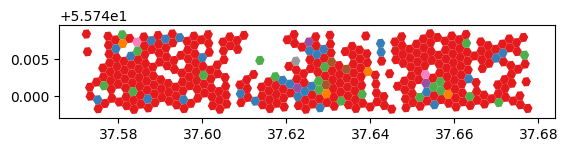

In [15]:
gdf.plot(column='properties.ReceiptTotalCount', cmap="Set1")